<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


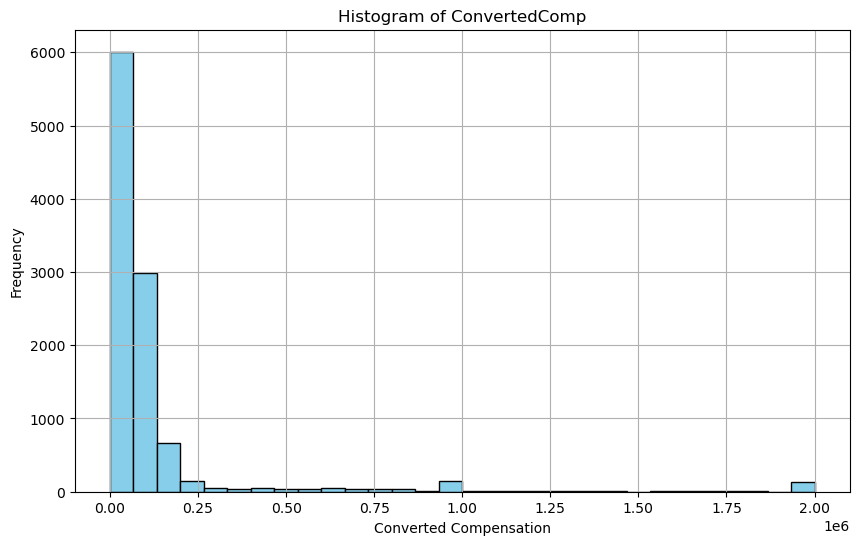

In [9]:
# your code goes here
import matplotlib.pyplot as plt

# your code goes here
# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


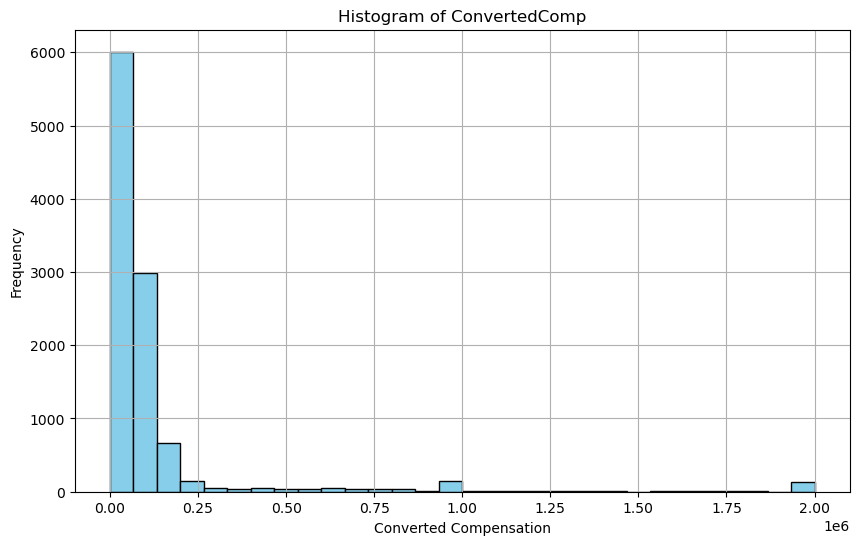

In [10]:
plt.figure(figsize=(10, 6))
df['ConvertedComp'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [33]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [12]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
man_df = df[df['Gender'] == 'Man']
man_df.shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
# Filter the DataFrame for respondents who have identified themselves as 'Woman'
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median 'ConvertedComp' for respondents who have identified themselves as 'Woman'
median_converted_comp_woman = woman_df['ConvertedComp'].median()

# Print the median 'ConvertedComp' for respondents who have identified themselves as 'Woman'
print("Median ConvertedComp for respondents who have identified themselves as 'Woman':", median_converted_comp_woman)

Median ConvertedComp for respondents who have identified themselves as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [18]:
# your code goes here
# Calculate descriptive statistics for the 'Age' column
age_min = df['Age'].min()
age_q1 = df['Age'].quantile(0.25)  # First quartile (Q1)
age_med = df['Age'].median()  # Median (Q2)
age_q3 = df['Age'].quantile(0.75)  # Third quartile (Q3)
age_max = df['Age'].max()

# Print the descriptive statistics
print("Minimum Age:", age_min)
print("First Quartile (Q1):", age_q1)
print("Median Age (Q2):", age_med)
print("Third Quartile (Q3):", age_q3)
print("Maximum Age:", age_max)

Minimum Age: 16.0
First Quartile (Q1): 25.0
Median Age (Q2): 29.0
Third Quartile (Q3): 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


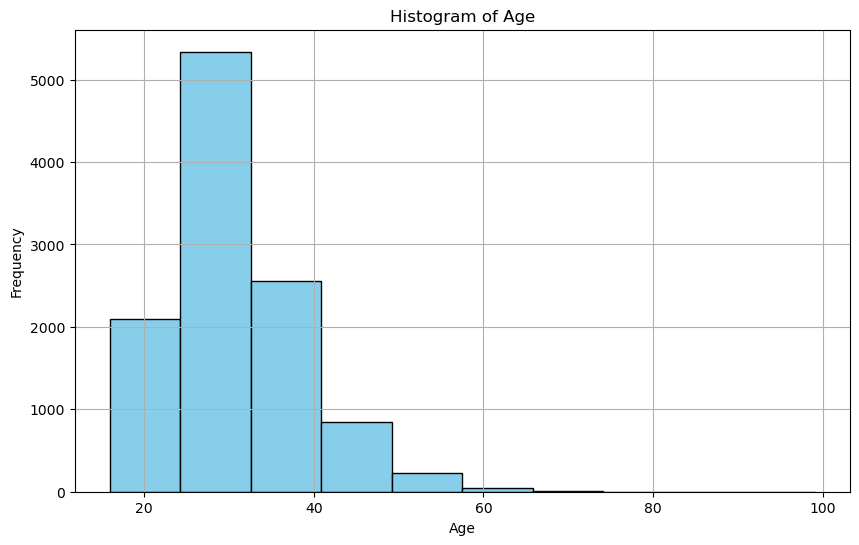

In [25]:
# your code goes here
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


In [27]:
conv_comp_med = df['ConvertedComp'].median()
conv_comp_med

57745.0

Find out if outliers exist in the column `ConvertedComp` using a box plot?


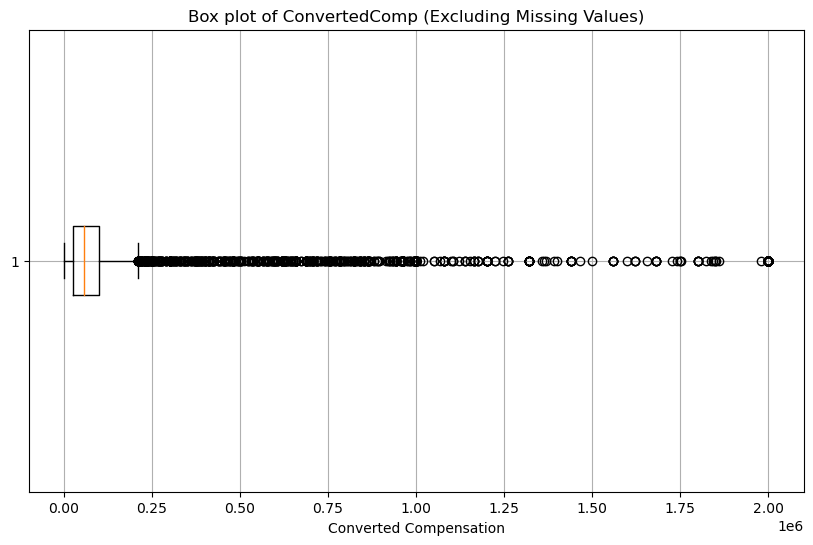

In [36]:
# your code goes here
# Check for missing values in the 'ConvertedComp' column
# Plot a box plot for the 'ConvertedComp' column, excluding missing values
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box plot of ConvertedComp (Excluding Missing Values)')
plt.xlabel('Converted Compensation')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [38]:
# your code goes here
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [40]:
# your code goes here
# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

# Print the lower and upper bounds
print("Lower Bound for ConvertedComp:", lower_bound)
print("Upper Bound for ConvertedComp:", upper_bound)

Lower Bound for ConvertedComp: -82830.0
Upper Bound for ConvertedComp: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [42]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print("Number of outliers in the ConvertedComp column:", num_outliers)

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [43]:
# your code goes here
# Create a new DataFrame by removing outliers
df_filtered = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the original and filtered DataFrames
print("Shape of the original DataFrame:", df.shape)
print("Shape of the filtered DataFrame (excluding outliers):", df_filtered.shape)

Shape of the original DataFrame: (11398, 85)
Shape of the filtered DataFrame (excluding outliers): (9703, 85)


Number of missing values in 'Age': 287


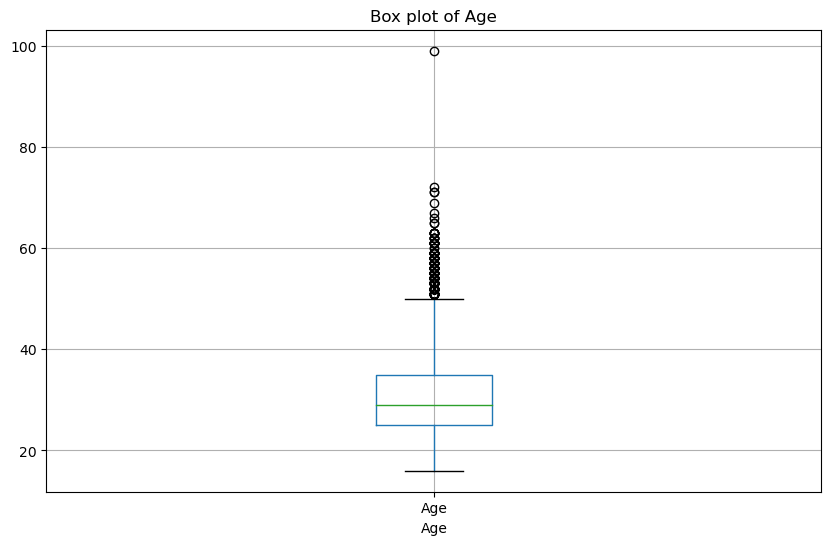

In [48]:
# Check for missing values in the 'ConvertedComp' column
missing_values = df['Age'].isnull().sum()
print("Number of missing values in 'Age':", missing_values)

# Plot a boxplot of the 'Age' column to examine the distribution of values
plt.figure(figsize=(10, 6))
df.boxplot(column =['Age'],grid=False)   
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [49]:
df_filtered['ConvertedComp'].mean()

59883.20838915799

In [50]:
df_filtered['ConvertedComp'].median()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [51]:
# your code goes here
# Find the correlation between 'Age' and all other numerical columns
age_correlation = df_filtered.corr()['Age']

# Print the correlation values
print("Correlation between Age and other numerical columns:")
print(age_correlation)

Correlation between Age and other numerical columns:
Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
